 ## HOTEL BOOKINGS 
 In the past few years, both the City Hotel and Resort Hotel have experienced significant increases in their cancellation rates. As a result, both hotels are currently facing a range of challenges, such as reduced revenue and underutilized hotel rooms. Therefore, the top priority for both hotels is to reduce their cancellation rates, which will enhance their efficiency in generating revenue. This report focuses on the analysis of hotel booking cancellations and other factors that do not directly impact their business and annual revenue generation.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
hb = pd.read_csv(r"S:\CPs\hotel_bookings.csv")

This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were cancelled.

Columns:

**hotel:** One of the hotels is a resort hotel and the other is a city hotel.

**is_canceled lead_time:** Value indicating if the booking was canceled (1) or not (0).

**arrival_date_year:** Year of arrival date

.
**arrival_date_month:** Month of arrival date with 12 categories: “January” to “December”.

**arrival_date_week_number:** Week number of the arrival date.

**arrival_date_day_of_month:** Day of the month of the arrival date.

**stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

**stays_in_week_nights:** Number of week nights (Monday to Friday) the guest stayed.

**adults:** Number of adults.

**children:** Number of Childern.

**babies:** Number of Babies.

**meal:** BB – Bed & Breakfast.

**country:** Country of origin.

**market_segment:** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

**distribution_channel:** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

**is_repeated_guest:** Value indicating if the booking name was from a repeated guest (1) or not (0).

**previous_cancellations:** Number of previous bookings that were cancelled by the customer prior to the current booking.

**previous_bookings_not_canceled:** Number of previous bookings not cancelled by the customer prior to the current booking.

**reserved_room_type:** Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type:** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

**booking_changes:** Number of changes/amendments made to the booking.

**deposit_type:** No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

**agent:** ID of the travel agency that made the booking.

**company:** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.

**days_in_waiting_list:** Number of days the booking was in the waiting list before it was confirmed to the customer.

**customer_type:** Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.

**adr:** Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)

**required_car_parking_spaces:** Number of car parking spaces required by the customer.

**total_of_special_requests:** Number of special requests made by the customer (e.g. twin bed or high floor).

**reservation_status:** Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.

**reservation_status_date:** Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.


In [22]:
hb.shape

(119390, 32)

In [23]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [24]:
hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [25]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [26]:
hb['reservation_status_date']= pd.to_datetime(hb['reservation_status_date'])

In [27]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [28]:
hb.select_dtypes(include = "object").columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [29]:
hb.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [30]:
hb["hotel"].replace({'Resort Hotel' : 0 , 'City Hotel' : 1} , inplace = True)
hb["arrival_date_month"].replace({'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January' : 1 , 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}, inplace = True)
hb["meal"].replace({'BB', 'FB', 'HB', 'SC', 'Undefined'})
hb["deposit_type"].replace({'No Deposit' : 0 , 'Refundable' : 2 , 'Non Refund' : 1} , inplace = True)
hb["customer_type"].replace({'Transient' : 0 , 'Contract' : 2 , 'Transient-Party' : 1 , 'Group' : 3} , inplace = True)
hb["reservation_status"].replace({'Check-Out' : 0 , 'Canceled' : 2 , 'No-Show' : 1}, inplace = True)
hb["reserved_room_type"].replace({'C' : 3, 'A' : 1 , 'D' : 4, 'E' : 5 , 'G' : 7, 'F' : 6, 'H' : 8, 'L' : 9 , 'P' : 10, 'B' : 2 } , inplace = True)
hb["assigned_room_type"].replace({'C' : 3, 'A' : 1 , 'D' : 4 , 'E' : 5 , 'G' : 7, 'F' : 6, 'I':9, 'B' : 2 , 'H' : 8 , 'P':12, 'L':11, 'K' : 10} , inplace = True)

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,3,3,3,0,NaN,NaN,0,0,0.0,0,0,0,2015-07-01
1,0,0,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,3,3,4,0,NaN,NaN,0,0,0.0,0,0,0,2015-07-01
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,1,3,0,0,NaN,NaN,0,0,75.0,0,0,0,2015-07-02
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,1,1,0,0,304.0,NaN,0,0,75.0,0,0,0,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,1,1,0,0,240.0,NaN,0,0,98.0,0,1,0,2015-07-03


In [33]:
hb.drop(['meal', 'agent' , "company" ,"market_segment" , "distribution_channel" , ], axis=1, inplace=True)
# hb.drop(['reservation_status_date'], axis=1, inplace=True)

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# hb[hb.select_dtypes(include = 'object').columns] = hb[hb.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [34]:
hb.drop(['reservation_status_date'], axis=1, inplace=True)

In [35]:
hb.shape

(119390, 26)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
hb[hb.select_dtypes(include = 'object').columns] = hb[hb.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [38]:
hb.select_dtypes(include =  "object").columns

Index([], dtype='object')

In [39]:
hb.isnull().sum()[hb.isnull().sum()>0]

children    4
dtype: int64

In [40]:
hb.dropna(inplace =True)

In [41]:
hb.isnull().sum()[hb.isnull().sum()>0]

Series([], dtype: int64)

In [42]:
# hb.drop(['company','agent'], axis =1, inplace = True)

In [43]:
hb.isnull().sum()[hb.isnull().sum()>0]

Series([], dtype: int64)

In [78]:
hb.select_dtypes(include = "object").columns

Index([], dtype='object')

# LOGISTIC REGRESSION

In [44]:
from sklearn.model_selection import train_test_split

hb_train , hb_test = train_test_split(hb , test_size=.2)

hb_train_x = hb_train.drop(["is_canceled"] , axis = 1)
hb_train_y = hb_train.is_canceled

hb_test_x = hb_test.drop(["is_canceled"] ,  axis = 1)
hb_test_y = hb_test.is_canceled

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(hb_train_x , hb_train_y);
lr

LogisticRegression()

In [46]:
pred_test = lr.predict(hb_test_x)
pred_test

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
pred_train = lr.predict(hb_train_x)
pred_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import *

In [49]:
tab = confusion_matrix(hb_test_y , pred_test)
tab

array([[14861,    79],
       [  392,  8546]], dtype=int64)

In [50]:
tab_cm = pd.DataFrame(tab)
tab_cm.columns = ["NC" , "C" ]
tab_cm.index = ["NC" , "C"]
tab_cm

,NC,C
NC,14861,79
C,392,8546


In [51]:
print(classification_report(hb_test_y , pred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14940
           1       0.99      0.96      0.97      8938

    accuracy                           0.98     23878
   macro avg       0.98      0.98      0.98     23878
weighted avg       0.98      0.98      0.98     23878



In [52]:
pred_probability = lr.predict_proba(hb_test_x) # the column having higher value will be predicted as the final outcome
pred_probability # 1st column = 0 -> q , 2nd column = 1 -> p

array([[1.10214793e-06, 9.99998898e-01],
       [1.10221248e-05, 9.99988978e-01],
       [9.99998824e-01, 1.17617596e-06],
       ...,
       [9.99830982e-01, 1.69017892e-04],
       [9.69852958e-01, 3.01470422e-02],
       [9.12708875e-01, 8.72911251e-02]])

In [53]:
pred_probability.shape

(23878, 2)

In [54]:
pred_probability[: , 1]# will select all the values for 1st column and we always talks in terms of "p"
# p value for each and every record for class 1

array([9.99998898e-01, 9.99988978e-01, 1.17617596e-06, ...,
       1.69017892e-04, 3.01470422e-02, 8.72911251e-02])

In [55]:
roc_auc_score(hb_test_y , pred_probability[: , 1] ) # area under curve

0.9915253390679147

In [56]:
FPr , TPr , Thresold = roc_curve(hb_test_y , pred_probability[: , 1] ) # fpr , tpr , thresold

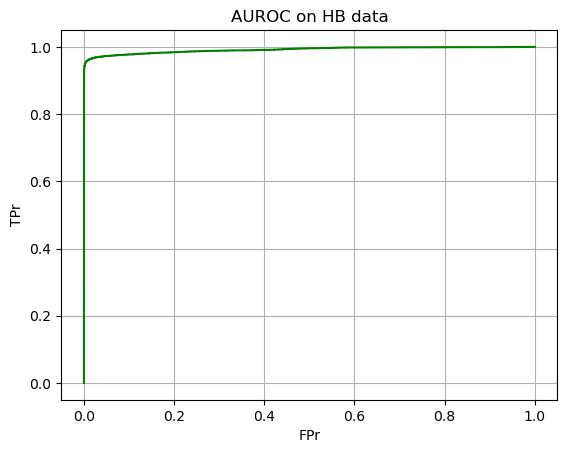

In [57]:
plt.plot(FPr , TPr , color = "Green")
plt.xlabel("FPr")
plt.ylabel("TPr")
plt.title("AUROC on HB data")
plt.grid()

# DECISION TREE

In [58]:
from sklearn.model_selection import train_test_split

hb_train , hb_test = train_test_split(hb , test_size=.2)

hb_train_x = hb_train.drop(["is_canceled"] , axis = 1)
hb_train_y = hb_train.is_canceled

hb_test_x = hb_test.drop(["is_canceled"] ,  axis = 1)
hb_test_y = hb_test.is_canceled

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(hb_train_x , hb_train_y)

DecisionTreeClassifier()

In [60]:
pred_dt = dt.predict(hb_test_x)

In [61]:
from sklearn.metrics import *

In [62]:
tab = confusion_matrix(hb_test_y , pred_dt)
tab

array([[15044,     0],
       [    0,  8834]], dtype=int64)

In [63]:
tab_cm = pd.DataFrame(tab)
tab_cm.columns = ["NC" , "C"]
tab_cm.index = ["NC" , "C"]
tab_cm

,NC,C
NC,15044,0
C,0,8834


In [64]:
print(classification_report(hb_test_y , pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15044
           1       1.00      1.00      1.00      8834

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



#### Feature Selection

In [66]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1.])

In [67]:
dt.feature_importances_.sum()

1.0

In [68]:
feature_imp = pd.DataFrame()
feature_imp["Features"] = hb_train_x.columns
feature_imp["Importance"] = dt.feature_importances_
feature_imp = feature_imp.sort_values("Importance" , ascending= False)
feature_imp

,Features,Importance
24,reservation_status,1.0
13,previous_cancellations,0.0
23,total_of_special_requests,0.0
22,required_car_parking_spaces,0.0
21,adr,0.0
20,customer_type,0.0
19,days_in_waiting_list,0.0
18,deposit_type,0.0
17,booking_changes,0.0
16,assigned_room_type,0.0


In [69]:
l1 = list(feature_imp.Features[0:20])
l1.append("is_canceled")

In [70]:
hb = hb.loc[: , l1]

In [71]:
from sklearn.model_selection import train_test_split

hb_train , hb_test = train_test_split(hb , test_size=.2)

hb_train_x = hb_train.drop(["is_canceled"] , axis = 1)
hb_train_y = hb_train.is_canceled

hb_test_x = hb_test.drop(["is_canceled"] ,  axis = 1)
hb_test_y = hb_test.is_canceled

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(hb_train_x , hb_train_y)

DecisionTreeClassifier()

In [73]:
pred_dt = dt.predict(hb_test_x)

In [74]:
from sklearn.metrics import *

In [75]:
tab = confusion_matrix(hb_test_y , pred_dt)
tab

array([[15019,     0],
       [    0,  8859]], dtype=int64)

In [76]:
print(classification_report(hb_test_y , pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15019
           1       1.00      1.00      1.00      8859

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



### RANDOM FOREST

In [83]:
from sklearn.model_selection import train_test_split

hb_train , hb_test = train_test_split(hb , test_size=.2)

hb_train_x = hb_train.drop(["is_canceled"] , axis = 1)
hb_train_y = hb_train.is_canceled

hb_test_x = hb_test.drop(["is_canceled"] ,  axis = 1)
hb_test_y = hb_test.is_canceled

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(hb_train_x , hb_train_y)

RandomForestClassifier(n_estimators=50)

In [85]:
pred_rfc = rfc.predict(hb_test_x)

In [86]:
tab_rfc = confusion_matrix(hb_test_y , pred_rfc)
tab_rfc

array([[14971,     0],
       [    0,  8907]], dtype=int64)

In [87]:
tab_cm = pd.DataFrame(tab)
tab_cm.columns = ["NC" , "C"]
tab_cm.index = ["NC" , "C"]
tab_cm

,NC,C
NC,15019,0
C,0,8859


In [88]:
print(classification_report(hb_test_y , pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14971
           1       1.00      1.00      1.00      8907

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [56]:
# BUILDING DIFF ML MODELS

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [58]:
hb = pd.read_csv(r"S:\CPs\hotel_bookings.csv")

In [59]:
hb.isnull().values.any()

True

In [60]:
hb.isnull().sum()[hb.isnull().sum()>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [61]:
# creating copy of dataframe
df_hb = hb.copy()

In [62]:
# Dataset Duplicate Value Count
df_hb[df_hb.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [63]:
#  drop duplicate values
df_hb.drop_duplicates(inplace = True)

In [64]:
df_hb.shape

(87396, 32)

In [65]:
# replacing missing values with 0
df_hb.fillna(0 , inplace = True)

In [66]:
df_hb.isnull().sum()[hb.isnull().sum()>0]

children    0
country     0
agent       0
company     0
dtype: int64

In [67]:
# Meal contains values "Undefined" which is equal to SC
df_hb["meal"].replace("undefined" , "SC" , inplace = True)

In [68]:
df_hb["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [69]:
subset = df_hb[(df_hb["children"] ==  0) & (df_hb["adults"] == 0 ) & (df_hb["babies"] == 0 )]

In [70]:
subset[["adults" , 'babies' , "children"]] # 166 invalid entries

,adults,babies,children
2224,0,0,0.0
2409,0,0,0.0
3181,0,0,0.0
3684,0,0,0.0
3708,0,0,0.0
...,...,...,...
115029,0,0,0.0
115091,0,0,0.0
116251,0,0,0.0
116534,0,0,0.0


In [71]:
delete = (df_hb["children"] == 0) & (df_hb["adults"] == 0 ) & (df_hb["babies"] == 0 )

In [72]:
data_hb = df_hb[~delete]  # where there is false it will become true known as negative delete

In [73]:
data_hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [74]:
subset = data_hb[(data_hb["children"] ==  0) & (data_hb["adults"] == 0 ) & (data_hb["babies"] == 0 )]
subset.head() # no invalid data is present 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [75]:
data_hb.isnull().sum()[data_hb.isnull().sum()>0]

Series([], dtype: int64)

In [76]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
data_hb[['children', 'company', 'agent']] = data_hb[['children', 'company', 'agent']].astype('int64')

In [77]:
# changing datatype of column 'reservation_status_date' to data_type.
data_hb['reservation_status_date'] = pd.to_datetime(data_hb['reservation_status_date'], format = '%Y-%m-%d')

In [78]:
# Adding total staying days in hotels
data_hb['total_stay'] = data_hb['stays_in_weekend_nights'] + data_hb['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
data_hb['total_people'] = data_hb['adults'] + data_hb['children'] + data_hb['babies']

In [79]:
data_hb["hotel"].replace({'Resort Hotel' : 0 , 'City Hotel' : 1} , inplace = True)
data_hb["arrival_date_month"].replace({'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January' : 1 , 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}, inplace = True)
data_hb["meal"].replace({'BB', 'FB', 'HB', 'SC', 'Undefined'})
data_hb["deposit_type"].replace({'No Deposit' : 0 , 'Refundable' : 2 , 'Non Refund' : 1} , inplace = True)
data_hb["customer_type"].replace({'Transient' : 0 , 'Contract' : 2 , 'Transient-Party' : 1 , 'Group' : 3} , inplace = True)
data_hb["reservation_status"].replace({'Check-Out' : 0 , 'Canceled' : 2 , 'No-Show' : 1}, inplace = True)
data_hb["reserved_room_type"].replace({'C' : 3, 'A' : 1 , 'D' : 4, 'E' : 5 , 'G' : 7, 'F' : 6, 'H' : 8, 'L' : 9 , 'P' : 10, 'B' : 2 } , inplace = True)
data_hb["assigned_room_type"].replace({'C' : 3, 'A' : 1 , 'D' : 4 , 'E' : 5 , 'G' : 7, 'F' : 6, 'I':9, 'B' : 2 , 'H' : 8 , 'P':12, 'L':11, 'K' : 10} , inplace = True)

In [80]:
data_hb.drop(['meal', 'agent' , "company" ,"market_segment" , "distribution_channel" , ], axis=1, inplace=True)

In [81]:
data_hb.drop(['reservation_status_date'], axis=1, inplace=True)

In [82]:
data_hb.drop(['country'], axis=1, inplace=True)

In [83]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# data_hb[data_hb.select_dtypes(include = 'object').columns] = data_hb[data_hb.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [84]:
data_hb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  int64  
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  int64  
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  int64  
 11  babies                          87230 non-null  int64  
 12  is_repeated_guest               8723

In [85]:
data_hb1 = data_hb # just for baackup

In [86]:
# from sklearn.model_selection import train_test_split

# hb_train , hb_test = train_test_split(data_hb , test_size=.2)

# hb_train_x = hb_train.drop(["is_canceled"] , axis = 1)
# hb_train_y = hb_train.is_canceled

# hb_test_x = hb_test.drop(["is_canceled"] ,  axis = 1)
# hb_test_y = hb_test.is_canceled

In [87]:
from sklearn.model_selection import train_test_split

hb_train , hb_test = train_test_split(data_hb , test_size=.2)

df1 = hb_train[hb_train.is_canceled == 1]
hb_train = pd.concat([hb_train , df1 , df1 ,df1 , df1 ,df1 ,df1 ,df1 ,df1])

In [88]:
hb_train_x = hb_train.drop(["is_canceled"] , axis = 1)
hb_train_y = hb_train.is_canceled

hb_test_x = hb_test.drop(["is_canceled"] ,  axis = 1)
hb_test_y = hb_test.is_canceled

In [89]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(hb_train_x , hb_train_y); 

In [90]:
pred_test = Logreg.predict(hb_test_x)
pred_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [91]:
from sklearn.metrics import * 

In [92]:
tab = confusion_matrix(hb_test_y , pred_test)
tab

array([[12306,   319],
       [   69,  4752]], dtype=int64)

In [93]:
tab_cm = pd.DataFrame(tab)
tab_cm.columns = [0 , 1]
tab_cm.index = [0 , 1]
tab_cm

,0,1
0,12306,319
1,69,4752


In [94]:
print(classification_report(hb_test_y , pred_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12625
           1       0.94      0.99      0.96      4821

    accuracy                           0.98     17446
   macro avg       0.97      0.98      0.97     17446
weighted avg       0.98      0.98      0.98     17446



In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(hb_train_x , hb_train_y)

DecisionTreeClassifier()

In [96]:
pred_test_hb =  dt.predict(hb_test_x)
pred_test_hb 

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [97]:
from sklearn.metrics import *

In [98]:
tab_hb = confusion_matrix(hb_test_y , pred_test_hb)
tab_hb

array([[12625,     0],
       [    0,  4821]], dtype=int64)

In [99]:
tab_cm = pd.DataFrame(tab_hb)
tab_cm.columns = [0 , 1]
tab_cm.index = [0 , 1]
tab_cm

,0,1
0,12625,0
1,0,4821


In [100]:
print(classification_report(hb_test_y , pred_test_hb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12625
           1       1.00      1.00      1.00      4821

    accuracy                           1.00     17446
   macro avg       1.00      1.00      1.00     17446
weighted avg       1.00      1.00      1.00     17446

